### Import statement

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score)

import torch
import torch.nn as nn
from torchsummary import summary

### Setup Global Parameters

In [2]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

EPOCHS = 1000
TEST_SIZE = 0.2
ALPHA = 0.001

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [4]:
data_df = pd.read_csv('wine.csv', header=None)
data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
data_df.shape

(178, 14)

In [6]:
data_df. describe().T

,count,mean,std,min,25%,50%,75%,max
0,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
1,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
2,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
3,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
4,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
5,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
6,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
7,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
8,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
9,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [7]:
data_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
1,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
2,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
3,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
4,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
5,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
6,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
7,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
8,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
9,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [8]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
1,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
2,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
3,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
4,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
5,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
6,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
7,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
8,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
9,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


<Axes: >

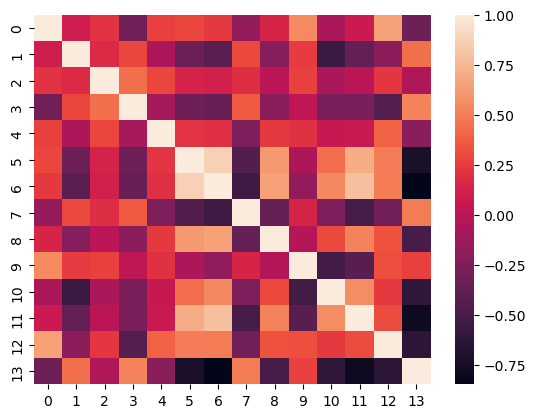

In [9]:
sns.heatmap(data_df.corr())

<Axes: >

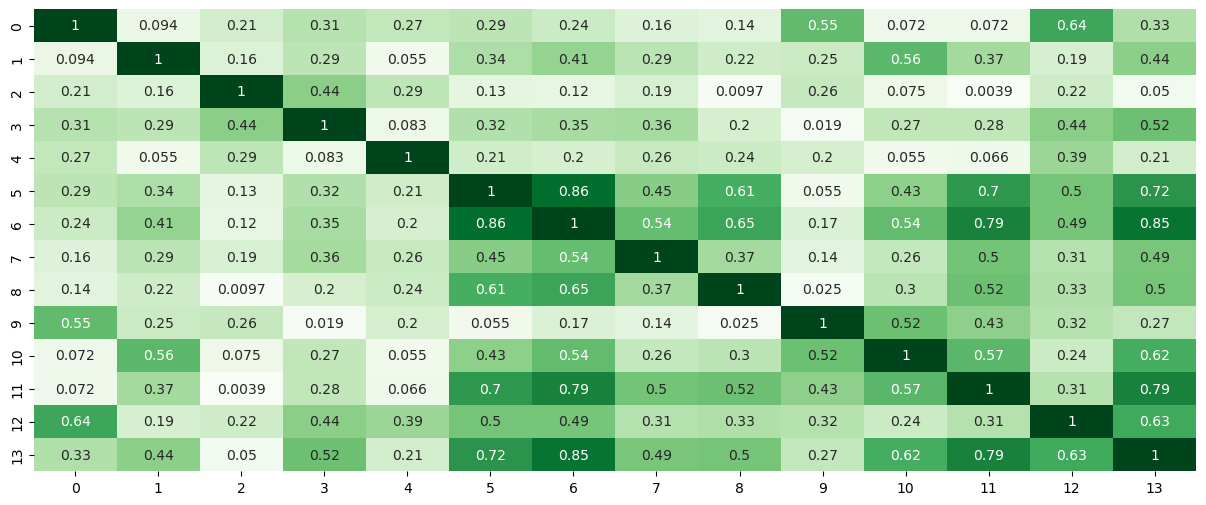

In [10]:
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(data_df.corr().abs(), ax=ax, cmap = 'Greens', annot=True, fmt='.2g', cbar = False)

In [11]:
for col in data_df.columns:
    print(f'{col}: {data_df[col].unique()}\n')

0: [14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]

1: [1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1.72 1.9  1.68 1.5
 1.66 1.83 1.53 1.8  1.65 3.99 3.84 1.89 3.98 4.04 3.59 2.02 1.75 1.67
 1.7  1.97 1.4

### Prepare Data for training 

In [12]:
labels= data_df[data_df.columns[-1]]
features_df = data_df.drop(data_df.columns[-1], axis = 1)
features_df.shape, labels.shape

((178, 13), (178,))

In [13]:
labels= data_df[data_df.columns[-1]]
features_df = data_df.drop(data_df.columns[-1], axis = 1)
assert features_df.shape[0] == labels.shape[0], 'Number of examples not same'

In [14]:
### Split the data in train test set
X_train, X_test, y_train, y_test = train_test_split(features_df,labels,
                                                    random_state=RANDOM_STATE,
                                                    stratify=labels,
                                                   test_size=TEST_SIZE)

assert X_train.shape[0] == y_train.shape[0], 'Number of training examples not same'
assert X_test.shape[0] == y_test.shape[0], 'Number of training examples not same'

In [15]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
y_test.unique()

array([2, 3, 1], dtype=int64)

In [17]:
le = LabelEncoder()    # convert 1, 2, 3 ---> 0, 1, 2
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [18]:
np.unique(y_train)

array([0, 1, 2], dtype=int64)

## Prepare model

In [19]:
np.unique(y_train)

array([0, 1, 2], dtype=int64)

In [20]:
# nodes : 13, 8, 3

model = nn.Sequential(
    nn.Linear(X_train.shape[1],8),

    nn.ReLU(),
    nn.Linear(8,3),
)

display(model)

Sequential(
  (0): Linear(in_features=13, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=3, bias=True)
)

In [21]:
summary(model.to(device=device), (1, 13))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]             112
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 3]              27
Total params: 139
Trainable params: 139
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [22]:
# Step 1 :  Loss function
loss_fn = nn.CrossEntropyLoss()

# Step 2 : Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=ALPHA)


In [23]:
train_x = torch.tensor(X_train, dtype=torch.float32, device=device)
train_y = torch.tensor(y_train, dtype=torch.int64, device=device)

test_x = torch.tensor(X_test, dtype=torch.float32, device=device)
test_y = torch.tensor(y_test, dtype=torch.int64, device=device)

### Unit testing

In [24]:
# pred = model(train_x[:1])
# pred

In [25]:
# loss_fn(pred, train_y[:1])

In [26]:
train_loss, test_loss = [], []

for epoch in range(EPOCHS):
    model.train()
    
    outputs = model(train_x)
    
    loss = loss_fn(outputs, train_y)
    
    optimizer.zero_grad()    # avoid accumulation of gradient
    loss.backward()
    optimizer.step()
    
    train_loss.append(loss.item())
    model.eval()

    with torch.no_grad():
        test_pred = model(test_x)
        tloss = loss_fn(test_pred, test_y)
    
        test_loss.append(tloss.item())
    
    if epoch % 100 == 0 or epoch == EPOCHS - 1:
        print(f'At epoch {epoch:4d}, loss is {loss.item():.4f}')

At epoch    0, loss is 1.1113
At epoch  100, loss is 0.6188
At epoch  200, loss is 0.2636
At epoch  300, loss is 0.1236
At epoch  400, loss is 0.0761
At epoch  500, loss is 0.0537
At epoch  600, loss is 0.0405
At epoch  700, loss is 0.0317
At epoch  800, loss is 0.0255
At epoch  900, loss is 0.0205
At epoch  999, loss is 0.0164


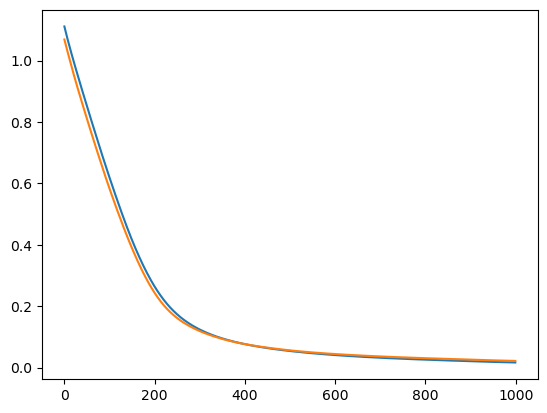

In [27]:
fig, ax = plt.subplots()

ax.plot(train_loss, label = 'Train')
ax.plot(test_loss, label = 'Test')

In [28]:
model.eval()

with torch.no_grad():
    
    train_pred = model(train_x)
    test_pred = model(test_x)
    
type(train_pred), type(test_pred)

(torch.Tensor, torch.Tensor)

In [29]:
y_train_pred = train_pred.detach()  # NO GRADIENT
y_train_pred = y_train_pred.cpu().numpy()
y_train_pred = y_train_pred.argmax(axis = 1)
y_train_pred

array([1, 1, 1, 1, 2, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2,
       1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 2, 2, 1, 0,
       1, 1, 0, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 0, 1, 1,
       2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2,
       1, 1, 1, 0, 1, 2, 1, 2, 0, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 2, 1, 0, 1, 1, 0, 2, 2], dtype=int64)

In [30]:
y_test_pred = test_pred.detach().cpu().numpy().argmax(axis = 1)
y_test_pred

array([1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 1, 1,
       1, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2], dtype=int64)

In [31]:
# loss_df = pd.DataFrame(history.history)
# loss_df.head()

In [32]:
# ax = loss_df.plot(y=['loss', 'val_loss'])

In [33]:
# ax = loss_df.plot(y=['accuracy', 'val_accuracy'])

In [34]:
# y_train_pred = model.predict(X_train).argmax(axis=1)
# y_test_pred = model.predict(X_test).argmax(axis=1)



In [35]:
accuracy_score(y_train, y_train_pred)

1.0

In [36]:
print(f'Accuracy: {accuracy_score(y_test, y_test_pred): .4f}')

Accuracy:  1.0000


In [37]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [38]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 10]], dtype=int64)

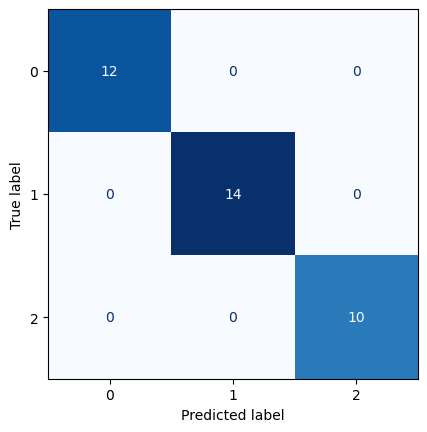

In [39]:
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap= 'Blues',colorbar = False)

In [40]:
f1_score(y_test, y_test_pred, average='weighted')

1.0

In [41]:
#''' F1 = 2 * (precision * recall)/ (precision +recall )
#f1_score(y_test, y_test_pred, average='weighted')